# ***STREAM : ML***

### **INNOVIZE Round 1**

#### *Fitness & Lifestyle Prediction Model*

Prototype by AI Devilops

Solution built-up by Deepak Kaura (Team Lead)

## **Problem Statement : -**

In today’s world, maintaining a healthy lifestyle is crucial for overall
well-being. Your task is to build a machine learning model that predicts
whether an individual is healthy or not based on the different physical
and lifestyle attributes.
You are provided with a dataset containing 6,000 entries of individuals,
each with attributes like physical fitness level, diet preferences, activity
level, sleep habits, mindfulness, and career. The goal is to train a model
that accurately predicts the is_healthy label (1 for healthy, 0
otherwise).

Can your model differentiate between healthy and unhealthy person
correctly? Let’s find out!



In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import HistGradientBoostingClassifier

df_fit = pd.read_csv('innovize_final_ml.csv')

In [22]:
df_fit.shape

(6000, 10)

In [ ]:
df_fit.head()

,phy_fitness,diet_pref,act_level,sleep_hrs,mindfulness,career,gender,daily_avg_steps,daily_avg_calories,is_healthy
0,3.0,Vegan,Sedentary,7,10,Artist,1.0,2020.0,1831.0,0
1,4.0,Vegan,Lightly Active,7,1,Teacher,0.0,5154.0,2190.0,0
2,8.0,Vegetarian,Active,8,10,Freelancer,1.0,12363.0,2297.0,1
3,2.0,Pescatarian,Sedentary,8,7,Doctor,0.0,1664.0,1943.0,0
4,9.0,Pescatarian,Highly Active,5,7,Business,0.0,17680.0,3527.0,1


In [23]:
df_fit.describe()

,phy_fitness,sleep_hrs,mindfulness,gender,daily_avg_steps,daily_avg_calories,is_healthy
count,5997.000000,6000.000000,6000.000000,5999.000000,5989.000000,5986.000000,6000.000000
mean,5.440554,7.010333,5.570667,0.507085,9034.638671,2390.541764,0.315333
std,2.888524,1.413822,2.876581,0.499991,5525.278444,638.908131,0.464687
min,1.000000,5.000000,1.000000,0.000000,1001.000000,1500.000000,0.000000
25%,3.000000,6.000000,3.000000,0.000000,4178.000000,1889.000000,0.000000
50%,5.000000,7.000000,6.000000,1.000000,8162.000000,2243.500000,0.000000
75%,8.000000,8.000000,8.000000,1.000000,13598.000000,2796.000000,1.000000
max,10.000000,9.000000,10.000000,1.000000,20000.000000,4193.000000,1.000000


In [3]:
df_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   phy_fitness         5997 non-null   float64
 1   diet_pref           5996 non-null   object 
 2   act_level           5994 non-null   object 
 3   sleep_hrs           6000 non-null   int64  
 4   mindfulness         6000 non-null   int64  
 5   career              5996 non-null   object 
 6   gender              5999 non-null   float64
 7   daily_avg_steps     5989 non-null   float64
 8   daily_avg_calories  5986 non-null   float64
 9   is_healthy          6000 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 468.9+ KB


In [ ]:
df_fit.isnull().sum()

,0
phy_fitness,3
diet_pref,4
act_level,6
sleep_hrs,0
mindfulness,0
career,4
gender,1
daily_avg_steps,11
daily_avg_calories,14
is_healthy,0


In [63]:
# Fill missing values for all columns
df_fit['phy_fitness'].fillna(df_fit['phy_fitness'].mean(), inplace=True)
df_fit['diet_pref'].fillna(df_fit['diet_pref'].mode()[0], inplace=True)
df_fit['act_level'].fillna(df_fit['act_level'].mode()[0], inplace=True)
df_fit['career'].fillna(df_fit['career'].mode()[0], inplace=True)
df_fit['gender'].fillna(df_fit['gender'].mode()[0], inplace=True)
df_fit['daily_avg_steps'].fillna(df_fit['daily_avg_steps'].mean(), inplace=True)
df_fit['daily_avg_calories'].fillna(df_fit['daily_avg_calories'].mean(), inplace=True)


<ipython-input-63-34f6d88df41b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fit['phy_fitness'].fillna(df_fit['phy_fitness'].mean(), inplace=True)
<ipython-input-63-34f6d88df41b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [42]:

# Numerical columns to check for outliers
num_cols = ['phy_fitness', 'gender', 'daily_avg_steps', 'daily_avg_calories', 'sleep_hrs', 'mindfulness']

# Calculate Q1, Q3, and IQR
Q1 = df_fit[num_cols].quantile(0.25)
Q3 = df_fit[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers = ((df_fit[num_cols] < (Q1 - 1.5 * IQR)) | (df_fit[num_cols] > (Q3 + 1.5 * IQR)))

# Display columns with outliers and the count of outliers
for col in num_cols:
    print(f"Outliers in {col}: {outliers[col].sum()}")

Outliers in phy_fitness: 0
Outliers in gender: 0
Outliers in daily_avg_steps: 0
Outliers in daily_avg_calories: 6
Outliers in sleep_hrs: 0
Outliers in mindfulness: 0


In [64]:
# Calculate Q1, Q3, and IQR for daily_avg_calories
Q1 = df_fit['daily_avg_calories'].quantile(0.25)
Q3 = df_fit['daily_avg_calories'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Filter the DataFrame to remove outliers
df_fit_no_outliers = df_fit[(df_fit['daily_avg_calories'] >= lower_bound) &
                            (df_fit['daily_avg_calories'] <= upper_bound)]

# Display the number of rows before and after removing outliers
print("Original DataFrame Shape:", df_fit.shape)
print("DataFrame Shape After Removing Outliers:", df_fit_no_outliers.shape)


Lower Bound: 535.125, Upper Bound: 4148.125
Original DataFrame Shape: (6000, 10)
DataFrame Shape After Removing Outliers: (5994, 10)


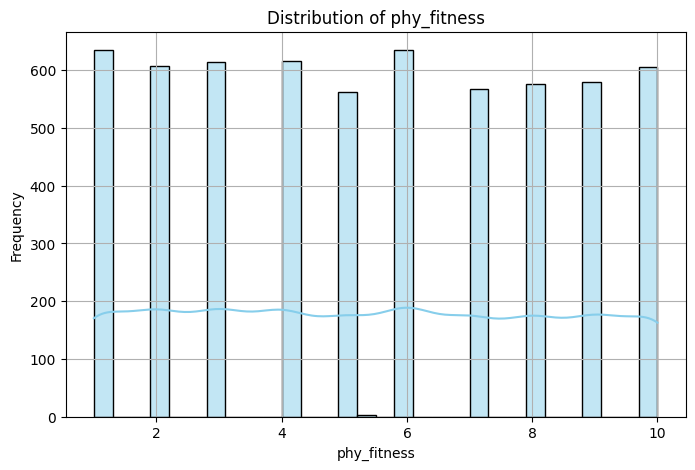

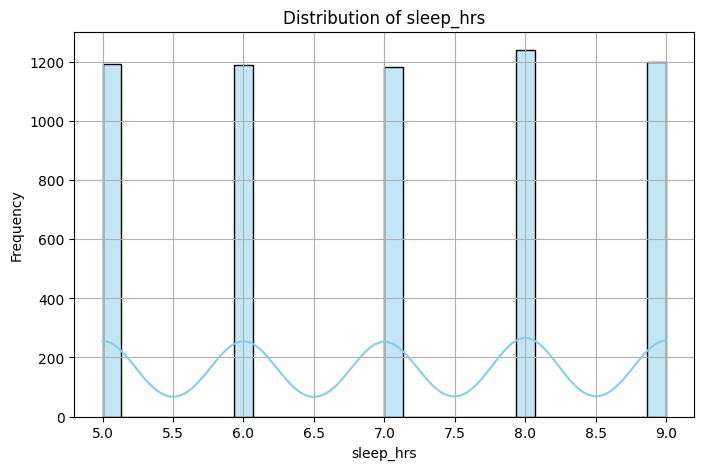

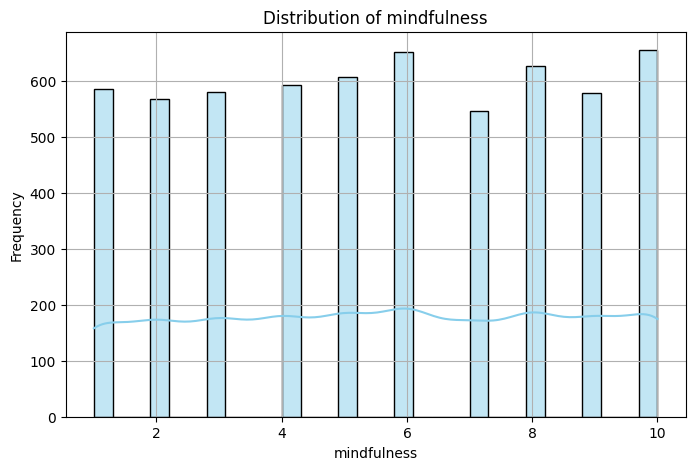

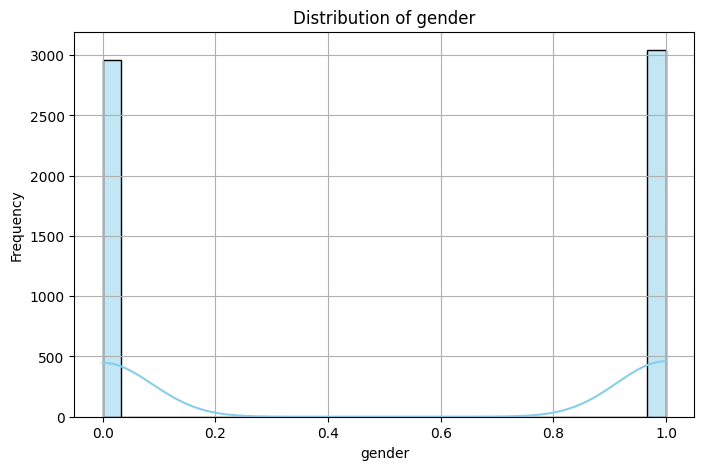

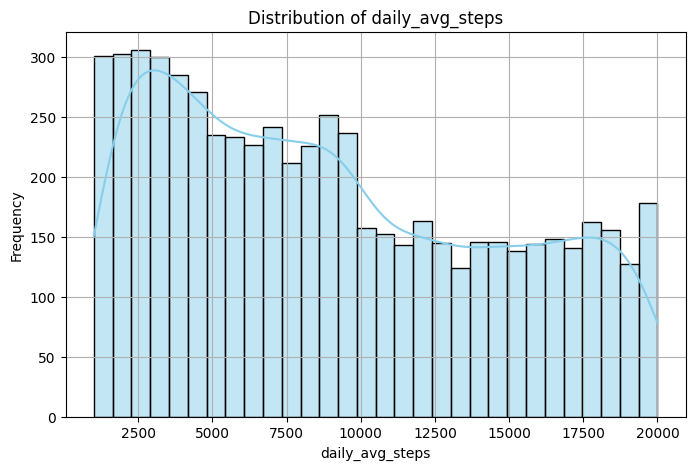

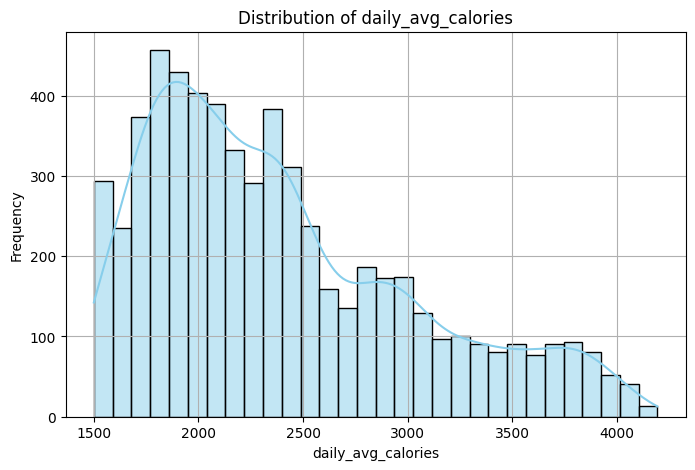

In [66]:

# Histograms for Numerical Columns
numerical_cols = ['phy_fitness', 'sleep_hrs', 'mindfulness', 'gender', 'daily_avg_steps', 'daily_avg_calories']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_fit[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


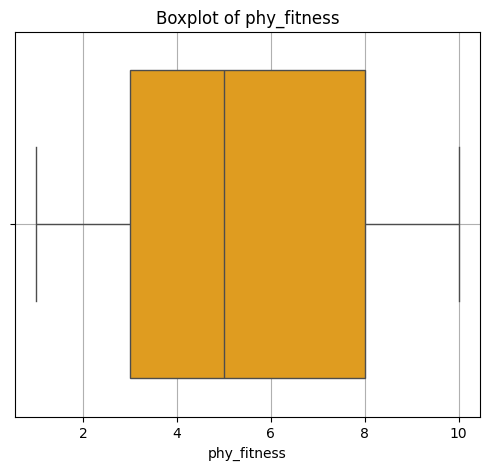

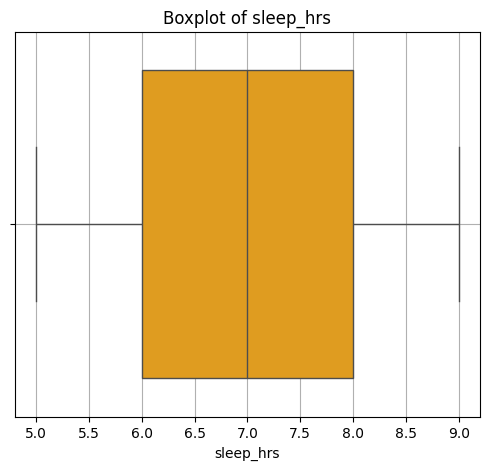

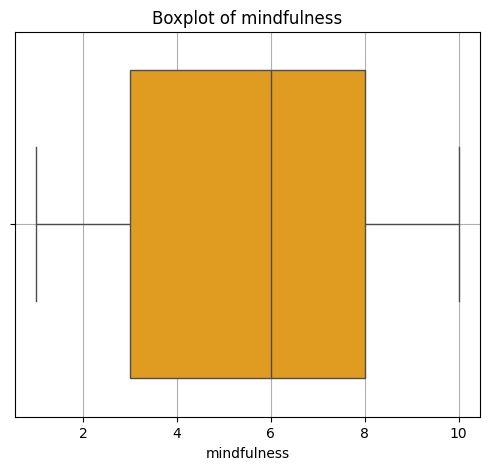

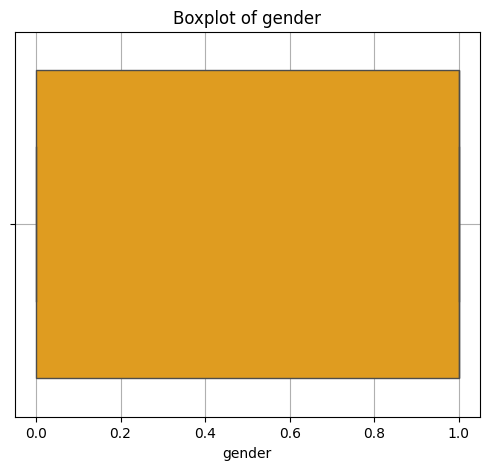

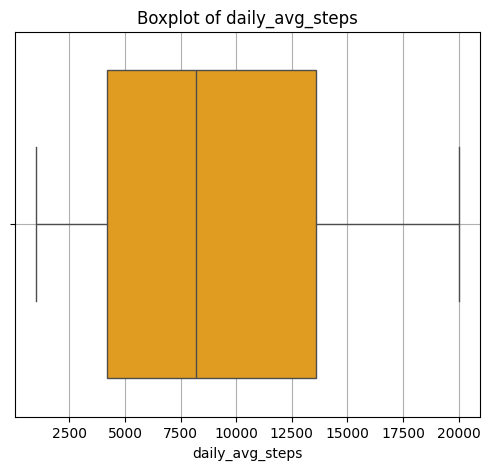

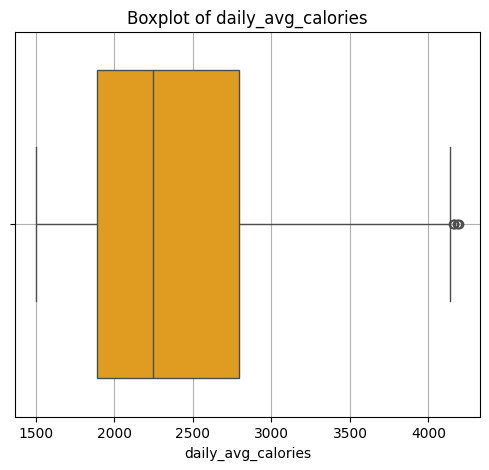

In [73]:
# Boxplots for Numerical Columns to detect outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 5))
    sns.boxplot(x=df_fit[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


<ipython-input-68-9a67ce892a1b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_fit[col], palette='viridis')


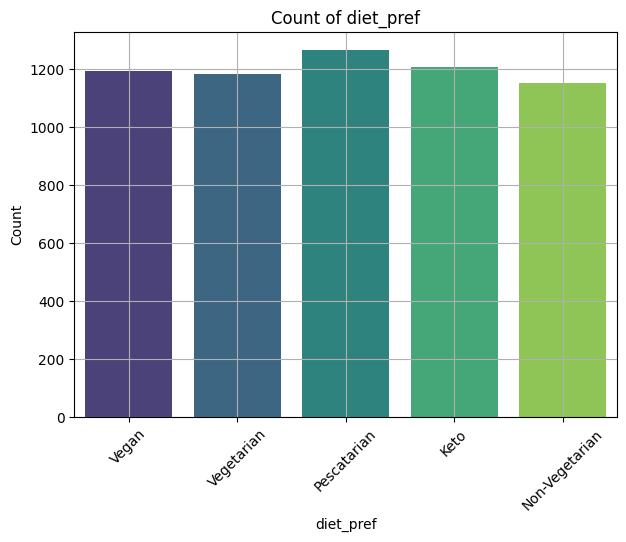

<ipython-input-68-9a67ce892a1b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_fit[col], palette='viridis')


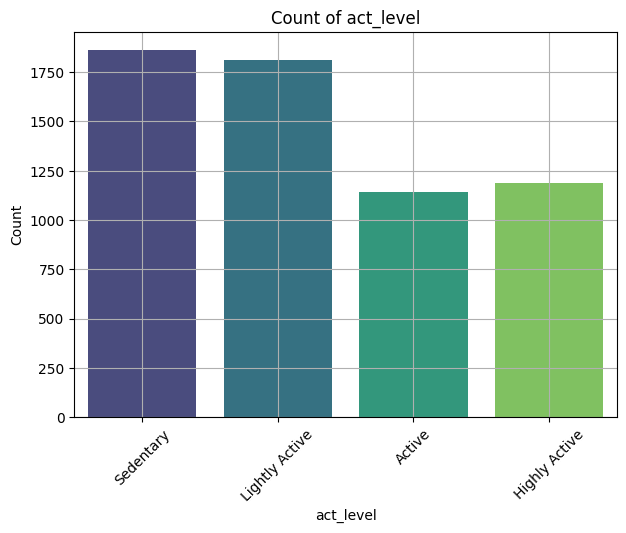

<ipython-input-68-9a67ce892a1b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_fit[col], palette='viridis')


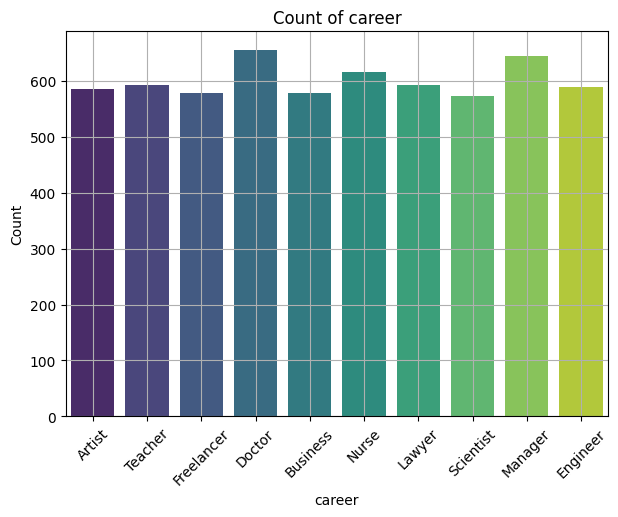

<ipython-input-68-9a67ce892a1b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_fit[col], palette='viridis')


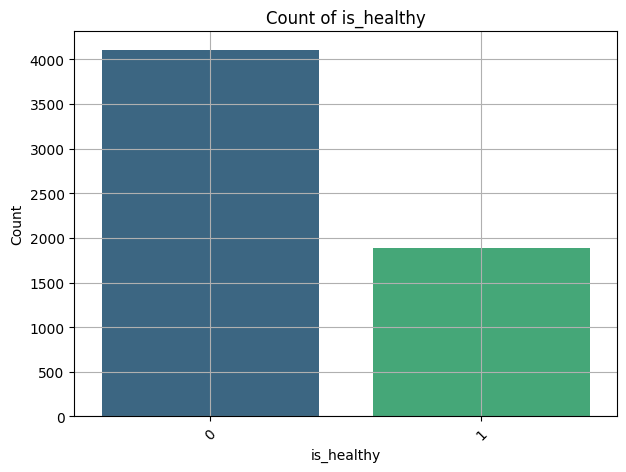

In [68]:

# Count Plots for Categorical Columns
categorical_cols = ['diet_pref', 'act_level', 'career', 'is_healthy']

for col in categorical_cols:
    plt.figure(figsize=(7, 5))
    sns.countplot(x=df_fit[col], palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


<ipython-input-69-e543c2d4c350>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='is_healthy', y=num_col, data=df_fit, palette='Set3')


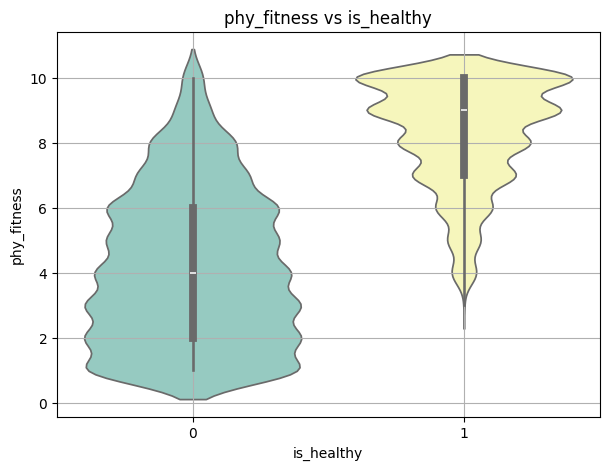

<ipython-input-69-e543c2d4c350>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='is_healthy', y=num_col, data=df_fit, palette='Set3')


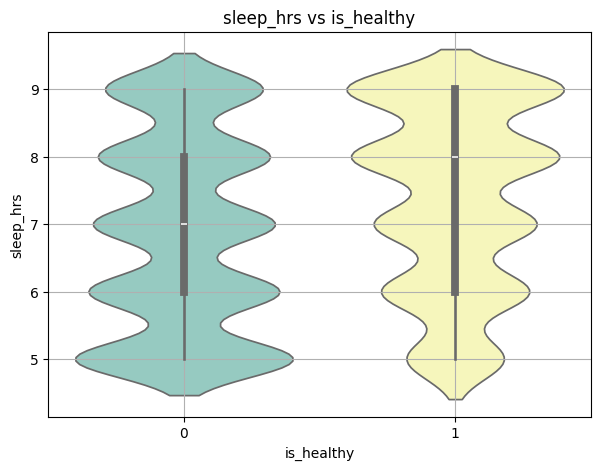

<ipython-input-69-e543c2d4c350>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='is_healthy', y=num_col, data=df_fit, palette='Set3')


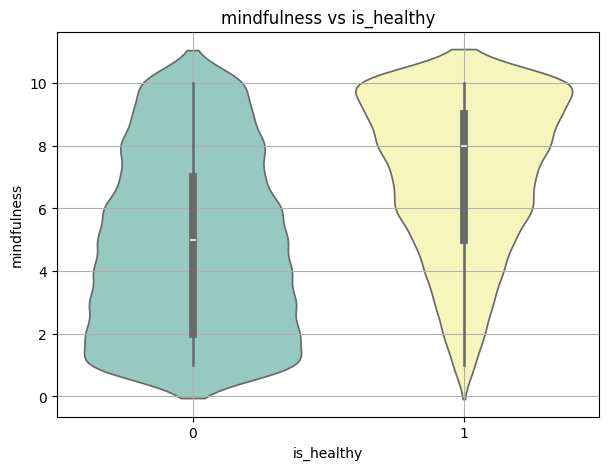

<ipython-input-69-e543c2d4c350>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='is_healthy', y=num_col, data=df_fit, palette='Set3')


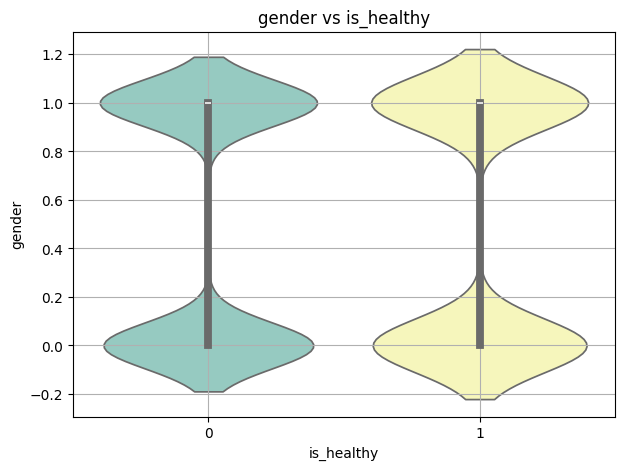

<ipython-input-69-e543c2d4c350>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='is_healthy', y=num_col, data=df_fit, palette='Set3')


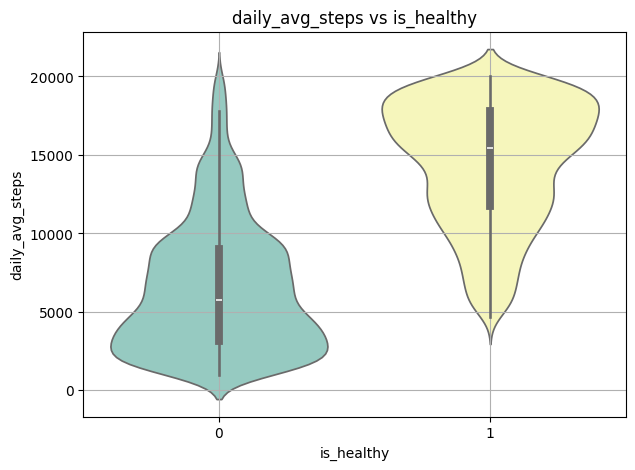

<ipython-input-69-e543c2d4c350>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='is_healthy', y=num_col, data=df_fit, palette='Set3')


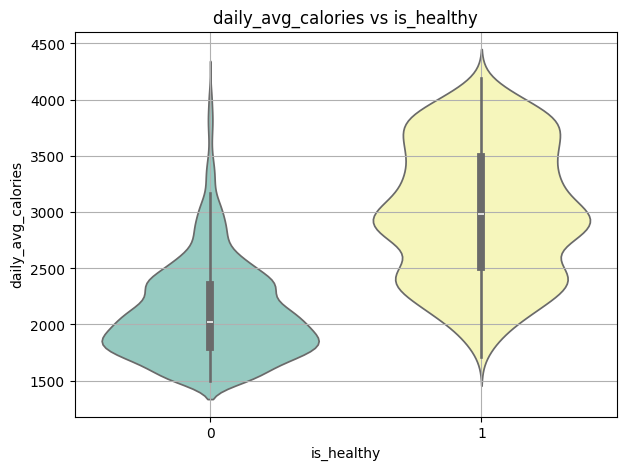

In [69]:
# Violin Plots for Numerical vs Categorical
for num_col in numerical_cols:
    plt.figure(figsize=(7, 5))
    sns.violinplot(x='is_healthy', y=num_col, data=df_fit, palette='Set3')
    plt.title(f'{num_col} vs is_healthy')
    plt.xlabel('is_healthy')
    plt.ylabel(num_col)
    plt.grid(True)
    plt.show()

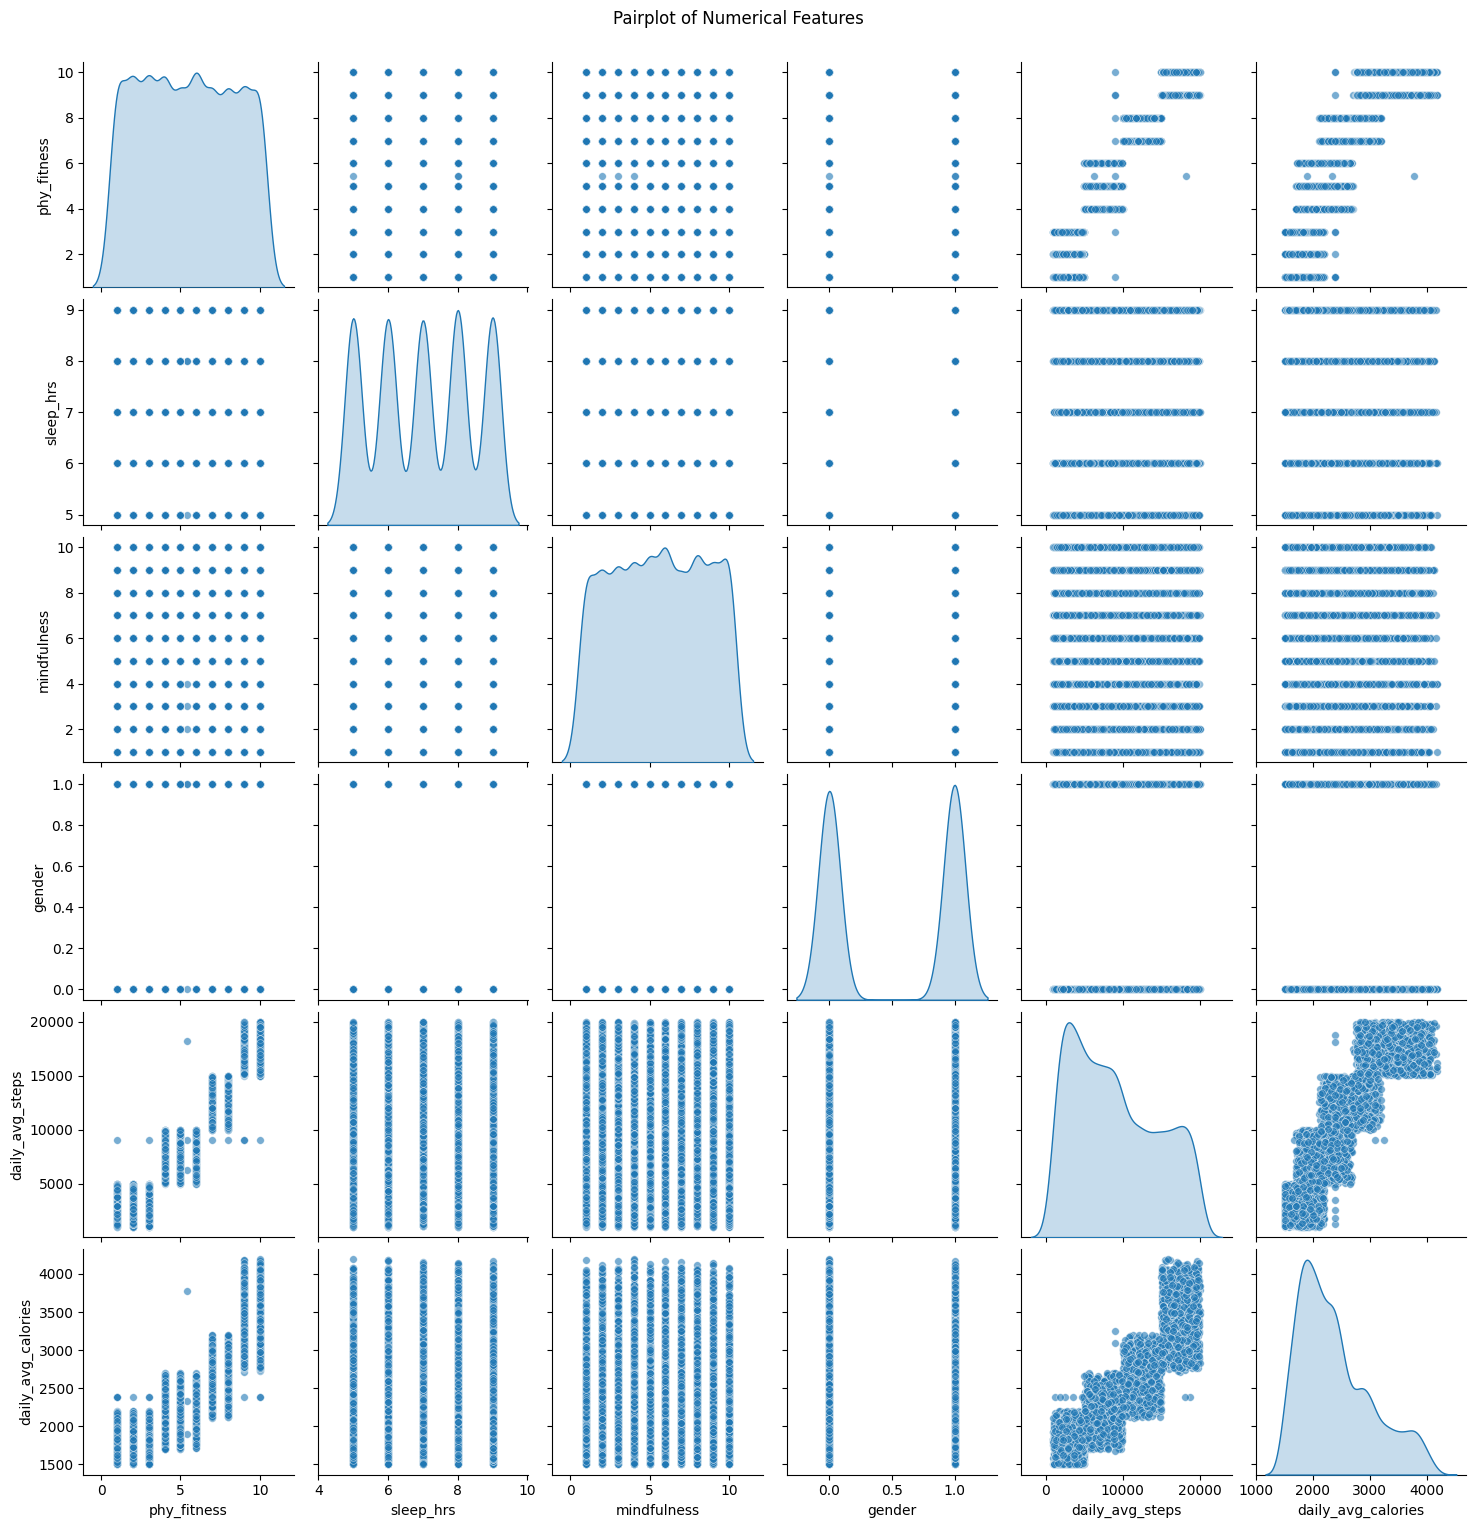

In [70]:
# Scatter Plots for Numerical vs Numerical
sns.pairplot(df_fit[numerical_cols], diag_kind='kde', plot_kws={'alpha':0.6, 's':30})
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

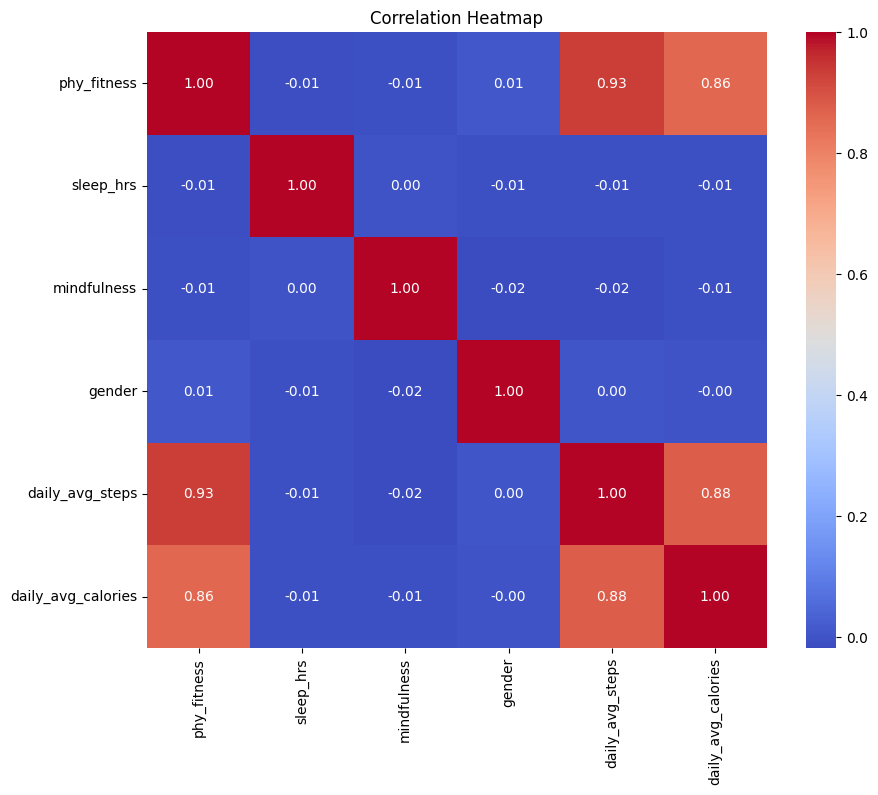

In [72]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_fit[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [60]:
df_fit_ml = df_fit.copy()

HistGradientBoostingClassifier Accuracy: 98.58%
----------------------------------------------------------------


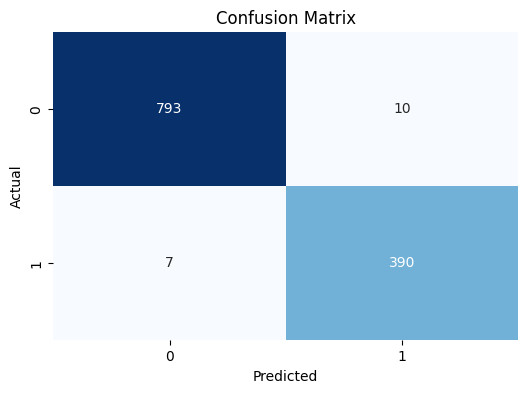

----------------------------------------------------------------


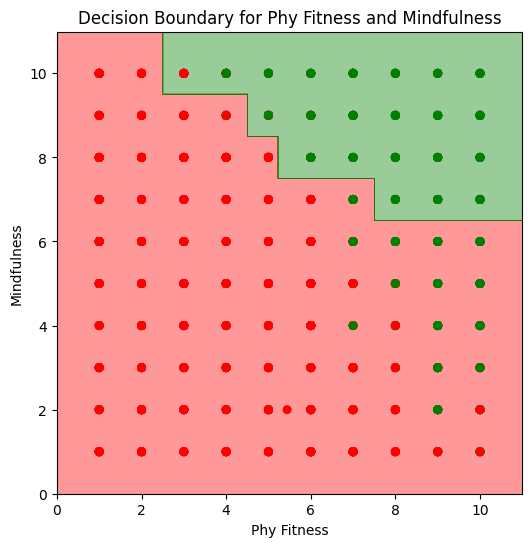

In [61]:

# Label Encoding for categorical features
le = LabelEncoder()
df_fit_ml['diet_pref'] = le.fit_transform(df_fit_ml['diet_pref'])
df_fit_ml['act_level'] = le.fit_transform(df_fit_ml['act_level'])
df_fit_ml['career'] = le.fit_transform(df_fit_ml['career'])

# Feature and Target Split
X = df_fit_ml.drop('is_healthy', axis=1)
y = df_fit_ml['is_healthy']

# Train-Test Split (No Scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
hgbc_model = HistGradientBoostingClassifier(random_state=42)
hgbc_model.fit(X_train, y_train)

# Predictions and Accuracy
y_pred = hgbc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'HistGradientBoostingClassifier Accuracy: {accuracy * 100:.2f}%')

print('----------------------------------------------------------------')
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('----------------------------------------------------------------')


# Extract the required features
X_phy_mind = X_test[['phy_fitness', 'mindfulness']].to_numpy()

# Convert y_pred from dict to NumPy array
y_pred_array = np.array(y_pred)

# Create a mesh grid for decision boundary
x_min, x_max = X_phy_mind[:, 0].min() - 1, X_phy_mind[:, 0].max() + 1
y_min, y_max = X_phy_mind[:, 1].min() - 1, X_phy_mind[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Prepare grid points
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Calculate the mean for other features
X_test_mean = X_test.mean().to_numpy()

# Create the full feature set for prediction
X_full = np.tile(X_test_mean, (grid_points.shape[0], 1))

# Replace the first two columns with the grid values for phy_fitness and mindfulness
X_full[:, X_test.columns.get_loc('phy_fitness')] = grid_points[:, 0]
X_full[:, X_test.columns.get_loc('mindfulness')] = grid_points[:, 1]

# Convert X_full back to a DataFrame with original column names
X_full_df = pd.DataFrame(X_full, columns=X_test.columns)

# Predict using the DataFrame (with column names)
Z = hgbc_model.predict(X_full_df)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_phy_mind[:, 0], X_phy_mind[:, 1], c=y_pred_array, marker='o', s=30, cmap=ListedColormap(('red', 'green')))
plt.title('Decision Boundary for Phy Fitness and Mindfulness')
plt.xlabel('Phy Fitness')
plt.ylabel('Mindfulness')
plt.show()
